In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('petrol_consumption.csv')

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [5]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [6]:
df.Petrol_tax.unique()

array([ 9.  ,  7.5 ,  8.  , 10.  ,  7.  ,  8.5 ,  6.58,  5.  ,  6.  ])

# EDA

<AxesSubplot:xlabel='Petrol_tax'>

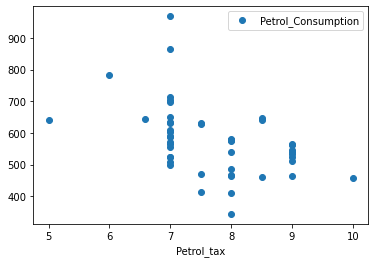

In [7]:
df.plot('Petrol_tax','Petrol_Consumption', style = 'o')

<AxesSubplot:xlabel='Petrol_tax'>

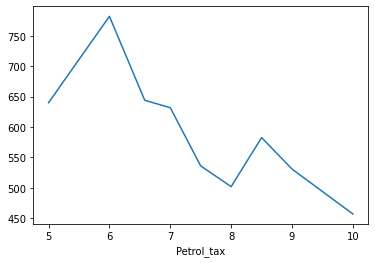

In [8]:
df.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


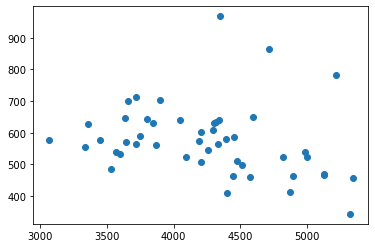

In [9]:
plt.scatter(df['Average_income'],df['Petrol_Consumption'])
df[['Average_income','Petrol_Consumption']].corr()

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.019042
Petrol_Consumption,0.019042,1.000000


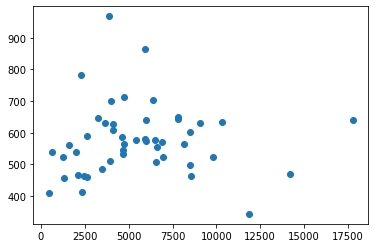

In [10]:
plt.scatter(df['Paved_Highways'],df['Petrol_Consumption'])
df[['Paved_Highways','Petrol_Consumption']].corr()

,Paved_Highways_transformed,Petrol_Consumption
Paved_Highways_transformed,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


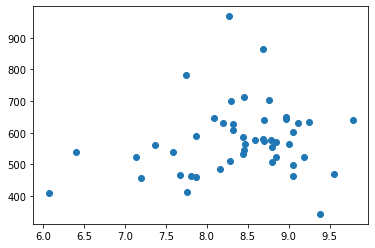

In [11]:
df['Paved_Highways_transformed'] = np.log(df['Paved_Highways'])
plt.scatter(df['Paved_Highways_transformed'],df['Petrol_Consumption'])
df[['Paved_Highways_transformed','Petrol_Consumption']].corr()

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


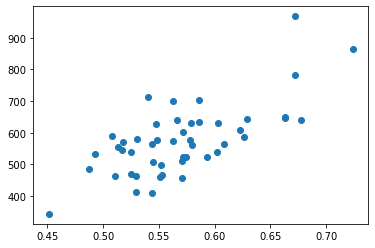

In [12]:
plt.scatter(df['Population_Driver_licence(%)'],df['Petrol_Consumption'])
df[['Population_Driver_licence(%)', 'Petrol_Consumption']].corr()

In [13]:
df = df.drop(columns = 'Paved_Highways')

In [14]:
X = df[['Petrol_tax','Average_income','Population_Driver_licence(%)','Paved_Highways_transformed']]
y = df['Petrol_Consumption']

In [15]:
X.shape, y.shape

((48, 4), (48,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled  = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training

In [18]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_scaled, y_train)
y_pred = LR.predict(X_test_scaled)

In [19]:
df_coeff = pd.DataFrame(LR.coef_,['Petrol_tax','Average_income',
                                      'Population_Driver_licence(%)','Paved_Highways_transformed'], columns = ['Coefficeint'])
df_coeff

,Coefficeint
Petrol_tax,-29.307553
Average_income,-39.941579
Population_Driver_licence(%),82.266726
Paved_Highways_transformed,-7.759973


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2665818714038918

# Feature Selection
